# 可视化分析

## mmyolo环境安装

In [2]:
!rm -rf mmyolo
!git clone -b tutorials https://github.com/open-mmlab/mmyolo.git 

Cloning into 'mmyolo'...
remote: Enumerating objects: 4898, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 4898 (delta 122), reused 230 (delta 112), pack-reused 4609
Receiving objects: 100% (4898/4898), 3.75 MiB | 1.89 MiB/s, done.
Resolving deltas: 100% (3011/3011), done.


In [6]:
!/root/miniconda3/envs/myconda/bin/mim install -e .

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.12.0/index.html
Obtaining file:///mnt/openmmlab-Camp/03-mmdetection-task/mmyolo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmyolo
    Found existing installation: mmyolo 0.5.0
    Uninstalling mmyolo-0.5.0:
      Successfully uninstalled mmyolo-0.5.0
  Running setup.py develop for mmyolo
    error: subprocess-exited-with-error
    
    × python setup.py develop did not run successfully.
    │ exit code: 1
    ╰─> [8 lines of output]
        Traceback (most recent call last):
          File "<string>", line 2, in <module>
          File "<pip-setuptools-caller>", line 34, in <module>
          File "/mnt/openmmlab-Camp/03-mmdetection-task/mmyolo/setup.py", line 159, in <module>
            add_mim_extension()
          File "/mnt/openmmlab-Camp/03-mmdetection-task/mmyolo/setup.py", line 146, in add_mim_extension
            os.symlin

In [3]:
!/root/miniconda3/envs/myconda/bin/mim install mmyolo

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 2.0 MB/s eta 0:00:0000:0100:01


## 特征图可视化

In [4]:
import cv2


img = cv2.imread('mmdetection/balloon_dataset/balloon_test.png')

print(img.shape)
# h,w=img.shape[:2]
# resized_img = cv2.resize(img, (640, 640))
# cv2.imwrite('mmdetection/cat_dataset/cat1_resize.jpg', resized_img)

(266, 400, 3)


In [2]:
import os
os.chdir('mmyolo')

### 1、可视化 backbone 输出的 3 个通道

In [7]:
!/root/miniconda3/envs/myconda/bin/python demo/featmap_vis_demo.py \
      ../mmdetection/balloon_dataset/balloon_test.png \
      ../mmdetection/balloon_dataset/balloon_rtmdet.py \
      ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean

Loads checkpoint by local backend from path: ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth
06/09 09:15:58 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (266, 400) and featmap: torch.Size([80, 80]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmen

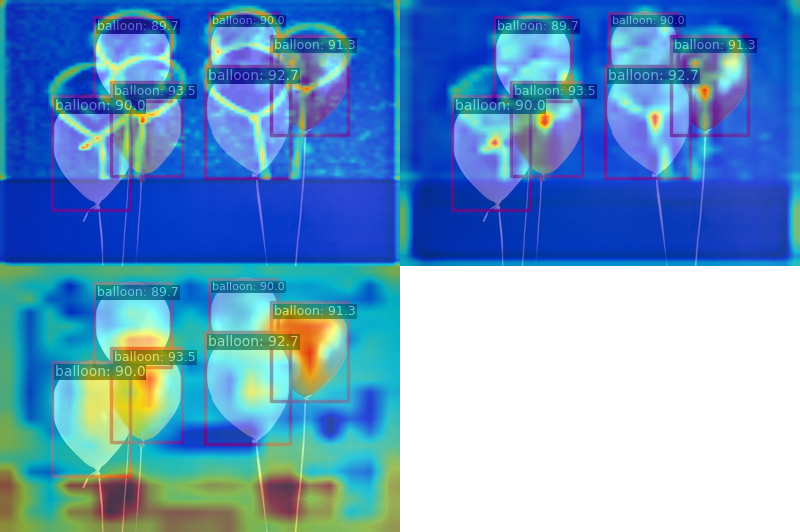

In [8]:
from PIL import Image
Image.open('output/balloon_test.png')     

### 2. 可视化 neck 输出的 3 个通道

In [8]:
!/root/miniconda3/envs/myconda/bin/python demo/featmap_vis_demo.py \
      ../mmdetection/balloon_dataset/balloon_test.png \
      ../mmdetection/balloon_dataset/balloon_rtmdet.py \
      ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean

Loads checkpoint by local backend from path: ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth
06/09 09:08:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (266, 400) and featmap: torch.Size([80, 80]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmen

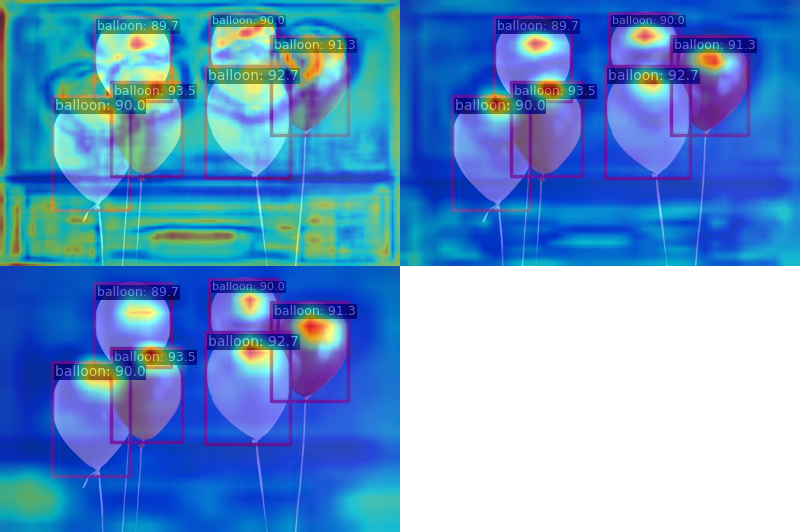

In [9]:
Image.open('output/balloon_test.png')     

## Grad-Based CAM 可视化

In [10]:
!/root/miniconda3/envs/myconda/bin/pip install "grad-cam"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.6 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38241 sha256=ecd78d9832f3622ab884a299f11b492802090ba2a5485d0677b520bcadb78178
  Stored in directory: /root/.cache/pip/wheels/6c/16/cb/1f4064fc8846c1cd9d029e2561bd809dab8eb6da34f51a1d03
Successfully built grad-cam


### 1、查看 neck 输出的最小输出特征图的 Grad CAM

In [3]:
!/root/miniconda3/envs/myconda/bin/python demo/boxam_vis_demo.py \
      ../mmdetection/balloon_dataset/balloon_test.png \
      ../mmdetection/balloon_dataset/balloon_rtmdet.py \
      ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth  \
      --target-layer neck.out_convs[2]

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/balloon_rtmdet/best_coco_bbox_mAP_epoch_120.pth
[                                                  ] 0/1, elapsed: 0s, ETA:Traceback (most recent call last):
  File "demo/boxam_vis_demo.py", line 276, in <module>
    main()
  File "demo/boxam_vis_demo.py", line 212, in main
    result = model_wrapper()[0]
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmyolo/utils/boxam_utils.py", line 222, in __call__
    self.detector.bbox_head.head_module.training = False
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1207, in __getattr__
    raise AttributeError("'{}' object has no attribute '{}'".format(
AttributeError: 'RTMDetSepBNHead' object has no attribute 'head_module'


### 2、查看 neck 输出的最大输出特征图的 Grad CAM

In [4]:
!/root/miniconda3/envs/myconda/bin/python demo/boxam_vis_demo.py \
      ../mmdetection/cat_dataset/cat1_resize.jpg \
      ../mmdetection/cat_dataset/cat_rtmdet_config.py \
      ../mmdetection/work_dirs/cat_rtmdet_config/best_coco_bbox_mAP_epoch_40.pth  \
      --target-layer neck.out_convs[0]

The algorithm currently used is rtmdet
Traceback (most recent call last):
  File "demo/boxam_vis_demo.py", line 276, in <module>
    main()
  File "demo/boxam_vis_demo.py", line 192, in main
    cfg = Config.fromfile(args.config)
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/config/config.py", line 178, in fromfile
    cfg_dict, cfg_text, env_variables = Config._file2dict(
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/config/config.py", line 458, in _file2dict
    check_file_exist(filename)
  File "/root/miniconda3/envs/myconda/lib/python3.8/site-packages/mmengine/utils/path.py", line 23, in check_file_exist
    raise FileNotFoundError(msg_tmpl.format(filename))
FileNotFoundError: file "/mnt/openmmlab-Camp/03-mmdetection-task/mmdetection/cat_dataset/cat_rtmdet_config.py" does not exist
